In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import scipy
from scipy.stats.stats import pearsonr
%matplotlib inline

Using TensorFlow backend.


In [2]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
Datetime    121273 non-null object
AEP_MW      121273 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [3]:
df.head(10)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0
5,2004-12-31 06:00:00,13038.0
6,2004-12-31 07:00:00,13692.0
7,2004-12-31 08:00:00,14297.0
8,2004-12-31 09:00:00,14719.0
9,2004-12-31 10:00:00,14941.0


# Reformat the Date Time Columns


In [4]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday


In [5]:
dataset

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday
2004-12-31 02:00:00,12865.0,12,2004,2004-12-31,02:00:00,53,Friday
2004-12-31 03:00:00,12577.0,12,2004,2004-12-31,03:00:00,53,Friday
2004-12-31 04:00:00,12517.0,12,2004,2004-12-31,04:00:00,53,Friday
2004-12-31 05:00:00,12670.0,12,2004,2004-12-31,05:00:00,53,Friday
2004-12-31 06:00:00,13038.0,12,2004,2004-12-31,06:00:00,53,Friday
2004-12-31 07:00:00,13692.0,12,2004,2004-12-31,07:00:00,53,Friday
2004-12-31 08:00:00,14297.0,12,2004,2004-12-31,08:00:00,53,Friday
2004-12-31 09:00:00,14719.0,12,2004,2004-12-31,09:00:00,53,Friday


In [6]:
print(dataset)

                      AEP_MW  Month  Year        Date      Time  Week  \
Datetime                                                                
2004-12-31 01:00:00  13478.0     12  2004  2004-12-31  01:00:00    53   
2004-12-31 02:00:00  12865.0     12  2004  2004-12-31  02:00:00    53   
2004-12-31 03:00:00  12577.0     12  2004  2004-12-31  03:00:00    53   
2004-12-31 04:00:00  12517.0     12  2004  2004-12-31  04:00:00    53   
2004-12-31 05:00:00  12670.0     12  2004  2004-12-31  05:00:00    53   
2004-12-31 06:00:00  13038.0     12  2004  2004-12-31  06:00:00    53   
2004-12-31 07:00:00  13692.0     12  2004  2004-12-31  07:00:00    53   
2004-12-31 08:00:00  14297.0     12  2004  2004-12-31  08:00:00    53   
2004-12-31 09:00:00  14719.0     12  2004  2004-12-31  09:00:00    53   
2004-12-31 10:00:00  14941.0     12  2004  2004-12-31  10:00:00    53   
2004-12-31 11:00:00  15184.0     12  2004  2004-12-31  11:00:00    53   
2004-12-31 12:00:00  15009.0     12  2004  2004-12-

In [7]:
type(dataset)

pandas.core.frame.DataFrame

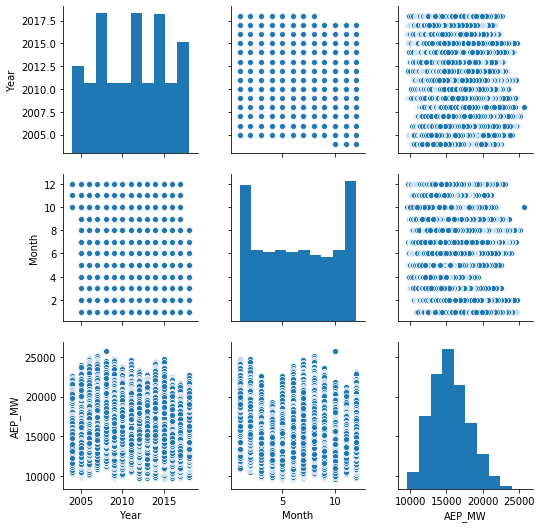

In [8]:
x= dataset[['Date','Year','Month','AEP_MW']]
sns.pairplot(x);

In [9]:
AEP_MW = dataset['AEP_MW']
Year = dataset['Year']
Date = dataset['Date']
Time = dataset['Time']

In [10]:
pearsonr_coefficient, p_value = pearsonr(AEP_MW, Year)
print( 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient))

PearsonR Correlation Coefficient -0.175


In [11]:
corr = x.corr()
corr

,Year,Month,AEP_MW
Year,1.000000,-0.093532,-0.175130
Month,-0.093532,1.000000,-0.125545
AEP_MW,-0.175130,-0.125545,1.000000


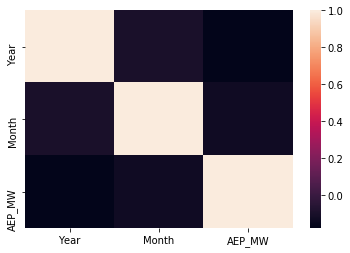

In [12]:
sns.heatmap (corr, xticklabels= corr.columns.values, yticklabels= corr.columns.values)

In [13]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



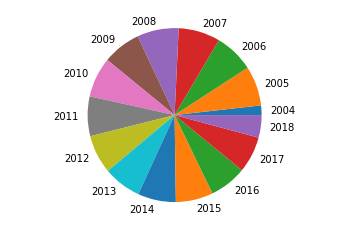

In [14]:
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

sums = dataset.groupby(dataset["Year"])["AEP_MW"].sum()
axis('equal');
pie(sums, labels=sums.index);
show()

# Energy consumption Each Year

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to Year')

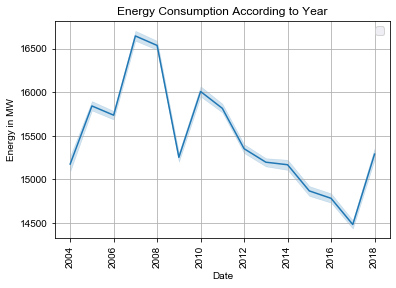

In [15]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,7)})

plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Energy Consumption According to month')

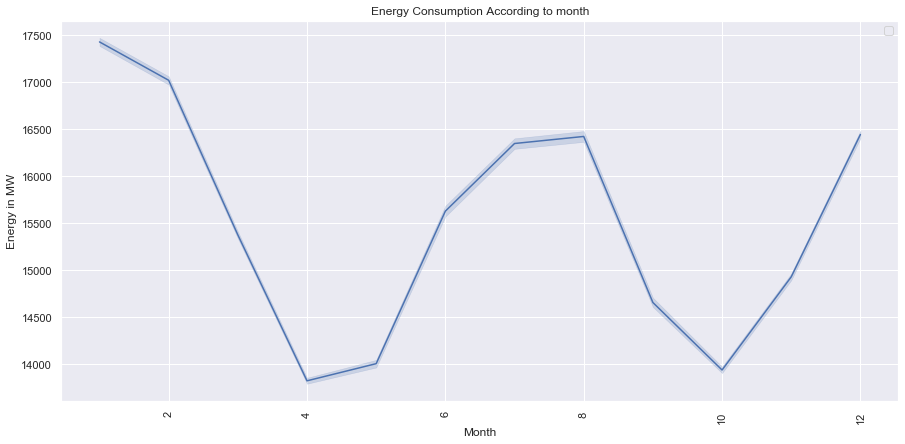

In [16]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Month"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,7)})

plt.xlabel("Month")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to month")

C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


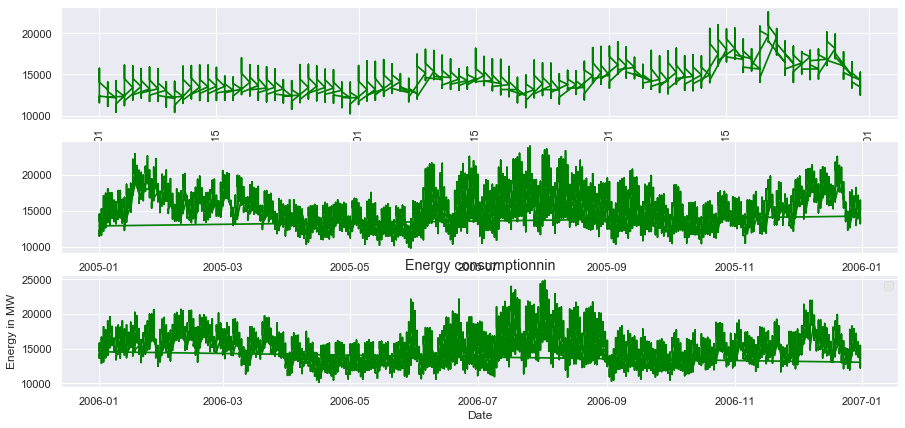

In [17]:
from matplotlib import style

fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)

style.use('ggplot')

y_2004 = dataset["2004"]["AEP_MW"].to_list()
x_2004 = dataset["2004"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)

y_2005 = dataset["2005"]["AEP_MW"].to_list()
x_2005 = dataset["2005"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1.7)

y_2006 = dataset["2006"]["AEP_MW"].to_list()
x_2006 = dataset["2006"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1.7)

plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

No handles with labels found to put in legend.


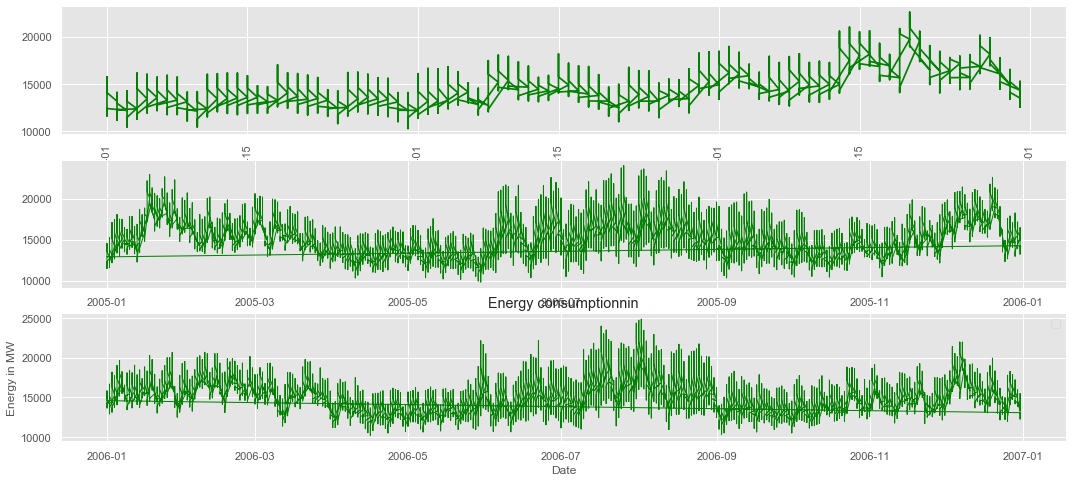

In [18]:
from matplotlib import style

fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)

style.use('ggplot')

y_2016 = dataset["2016"]["AEP_MW"].to_list()
x_2016 = dataset["2016"]["Date"].to_list()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)

y_2017 = dataset["2017"]["AEP_MW"].to_list()
x_2017 = dataset["2017"]["Date"].to_list()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)

y_2018 = dataset["2018"]["AEP_MW"].to_list()
x_2018 = dataset["2018"]["Date"].to_list()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)

plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

Text(0.5, 1.0, 'Energy Distribution')

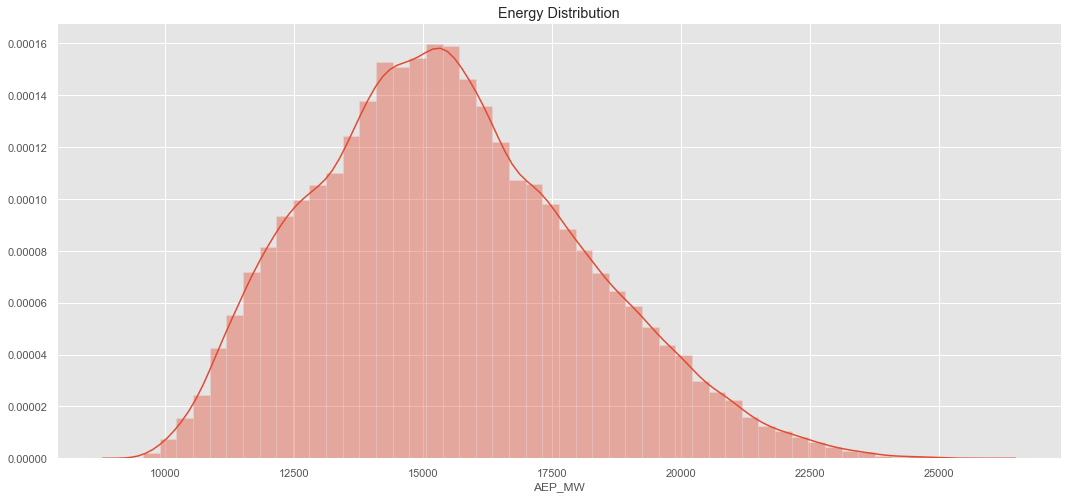

In [19]:
sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")

# Energy with Respect to Time

No handles with labels found to put in legend.


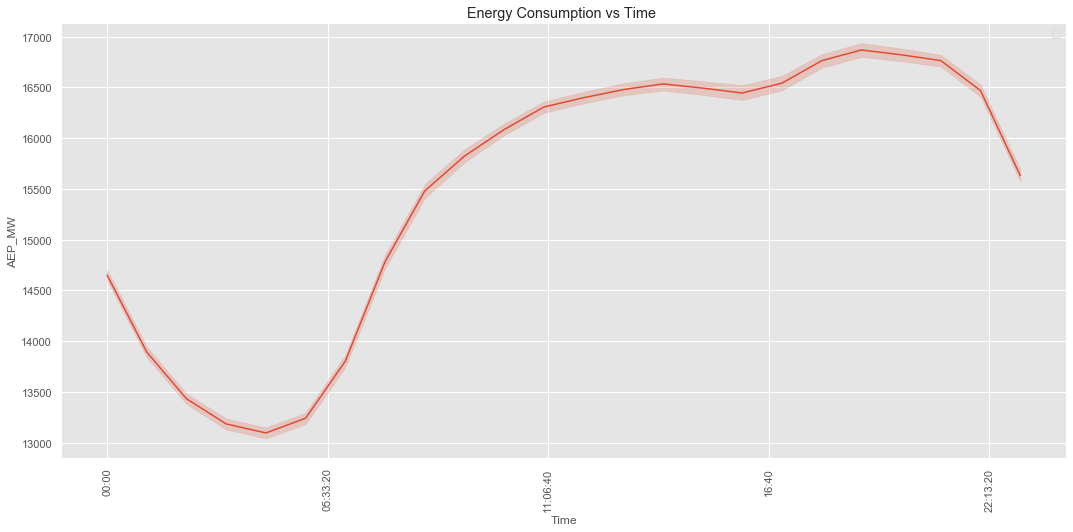

In [20]:
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=dataset["Time"],y=dataset["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

# Resampleing Data

In [21]:
NewDataSet = dataset.resample('D').mean()

In [22]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


In [23]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [24]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 4)


In [25]:
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [26]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [27]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

# Model

In [28]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
4935/4935 [==============================] - 26s 5ms/step - loss: 0.0222
Epoch 2/50
4935/4935 [==============================] - 19s 4ms/step - loss: 0.0176
Epoch 3/50
4935/4935 [==============================] - 21s 4ms/step - loss: 0.0171
Epoch 4/50
4935/4935 [==============================] - 20s 4ms/step - loss: 0.0161
Epoch 5/50
4935/4935 [==============================] - 20s 4ms/step - loss: 0.0157
Epoch 6/50
4672/4935 [===========================>..] - ETA: 1s - loss: 0.0154

# Test Data

In [ ]:
TestData.head(2)

In [ ]:
TestData.shape

In [ ]:
NewDataSet.shape

In [ ]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [ ]:
Df_Total.shape

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_energy_consumption = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_energy_consumption = sc.inverse_transform(predicted_energy_consumption)

In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_energy_consumption
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

# Future Predicted

In [ ]:
Machine_Df

In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()